In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
#Define graph, input from Opdracht
#Only edges are necessary, nodes are automatically deduced from these edges
#Manual input :-(
G = nx.Graph()
G.add_weighted_edges_from([(1,2,1),(1,3,2),(1,7,1),(1,21,3),(2,4,3),(2,6,4),(2,19,4),(3,7,2),(3,5,1),(3,10,1),(4,11,2),(4,12,4),(5,7,1),(5,9,4),(5,10,1),(6,8,2),(6,9,2),(7,9,1),(7,18,3),(8,10,4),(8,17,4),(8,22,2),(9,10,1),(10,11,3),(10,16,4),
(10,18,3),(11,12,2),(12,13,1),(12,27,1),(13,18,1),(13,19,1),(13,20,2),(14,16,4),(14,15,3),(14,19,3),(15,17,2),(15,24,2),(16,18,2),(16,28,4),(16,29,1),(16,30,4),(17,20,4),(17,23,2),(18,20,3),(19,26,1),(20,25,1)])


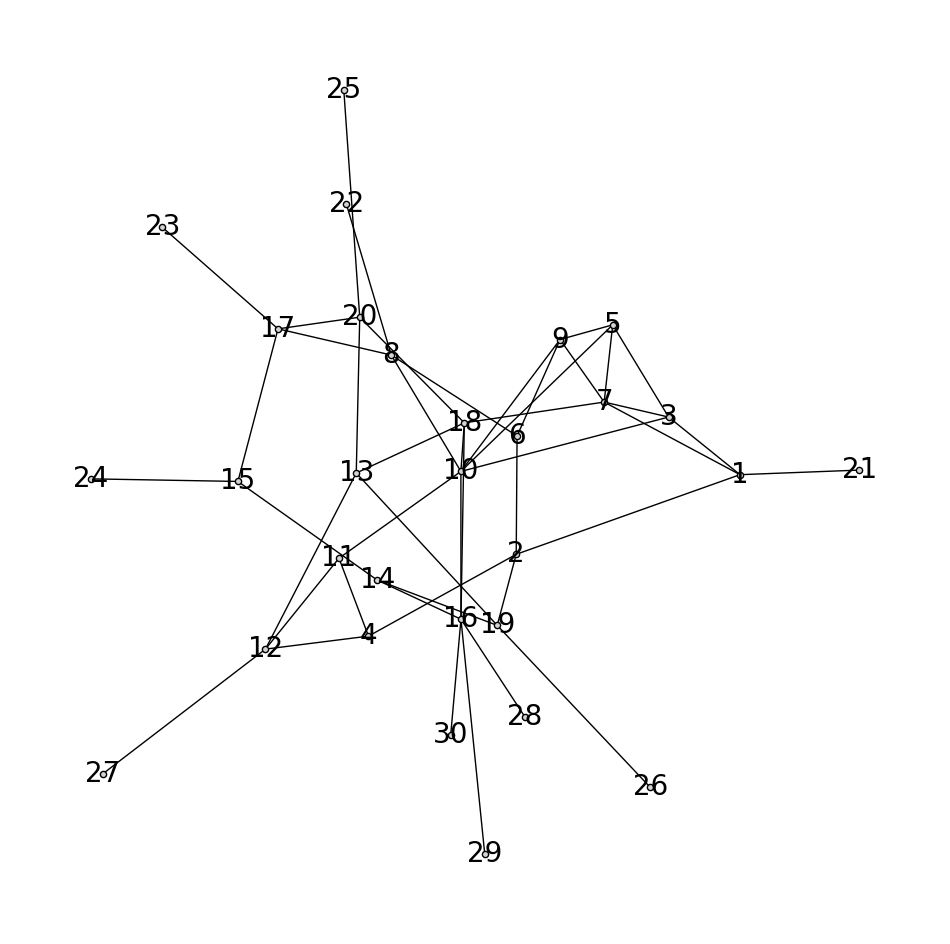

In [3]:
#Visualise graph, automatic layout option always suck
fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, ax=ax, node_color='lightgray',
                       edgecolors='black', node_size=20)
nx.draw_networkx_edges(G, pos=pos, ax=ax, node_size=20)
nx.draw_networkx_labels(G, pos=pos, ax=ax, labels=dict(zip(set(range(1,31)), set(range(1,31)))),
                        font_size=20)
plt.axis('off')
plt.show()

In [9]:
#Code for Weapon Factory Pt. 1
#Answer was correct
answer = []

for i in range(1,31):#All cities as source
    tot_length=0
    for j in range(1,31):#All cities as target
        try: 
            length=nx.shortest_path_length(G, source=i, target=j, weight='weight')#Calculate shortes path given the weighted edges
            tot_length = tot_length + length
        except:
            print('not good')
    answer.append(tot_length)
print(answer)
print('City:',answer.index(min(answer))+1)

[177, 181, 174, 219, 173, 196, 161, 208, 166, 154, 178, 163, 141, 201, 238, 168, 222, 140, 157, 175, 261, 264, 278, 294, 203, 185, 191, 280, 196, 280]
City: 18


In [5]:
#Code for Weapon Factory Pt. 2
#Answer was not correct. Either a bug or the approach is wrong. This code looks at the three edges separately. If looked at combined then approach should be:
#1. make all possible combinations of 3 edges with weight 10
#2. remove those with source city 18
#3. try all combinations with those cities at weight=10
#4. choose the three highest scoring
output = []

for edge in G.edges(data=True):
    if edge[0] == 18:#Skip over edges connected to city 18
        continue
    else:
        save=edge[2]['weight']#Store correct weight
        edge[2]['weight'] = 10#Change weight as part of simulation

        answer = []

        for i in range(1,31):
            tot_length=0
            for j in range(1,31):
                try: 
                    length=nx.shortest_path_length(G, source=i, target=j, weight='weight')
                    tot_length = tot_length + length
                except:
                    print('not good')
            answer.append(tot_length)
        result=min(answer)
        output.append([edge[0],edge[1], result])

        edge[2]['weight']=save#Restore correct weight

df = pd.DataFrame(output, columns=["x", "y", "z"])
df.sort_values(["z"], ascending=False)#And choose top 3, with (x,y) as the edges

,x,y,z
17,19,13,157
28,12,13,154
19,19,26,149
40,20,25,149
37,16,29,149
29,12,27,149
42,15,24,148
31,8,22,148
34,17,23,148
3,1,21,147
